In [1]:
import numpy as np
from numba import jit
import pints
import pints.plot
import pints_smol_jit_num_clus_pro as toy
import matplotlib.pyplot as plt

import scipy.stats as stats



Select the desired model, true parameters and time array.

Then simulate to get synthetic data

In [2]:

model = toy.SmolModel(None,None)


true_parameters = [0.0002, 0.0025, 500]


times = np.linspace(0, 97, 9700)

org_values = model.simulate(true_parameters, times)

print(org_values)

print(org_values.shape)

parameter_names = ["b","p","N"]


Init 1
[[5.00000000e+002 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [4.99500317e+002 2.62139880e-001 1.37561024e-004 ... 6.35986003e-319
  2.51973479e-322 0.00000000e+000]
 [4.99001370e+002 5.23506860e-001 5.49205579e-004 ... 2.89955856e-284
  3.04971525e-287 3.20351438e-290]
 ...
 [2.78359318e+000 2.84437375e+000 2.90570097e+000 ... 1.97133509e+001
  2.03015070e+001 2.09216123e+001]
 [2.77900802e+000 2.83988115e+000 2.90130497e+000 ... 1.97643931e+001
  2.03546617e+001 2.09769895e+001]
 [2.77442406e+000 2.83538944e+000 2.89690957e+000 ... 1.98155610e+001
  2.04079486e+001 2.10325060e+001]]
(9700, 100)


In [3]:
from tabulate import tabulate
class MyMCMCSummary(pints.MCMCSummary):
    def __str__(self):
        """
        Prints posterior summaries for all parameters to the console, including
        the parameter name, posterior mean, posterior std deviation, the
        2.5%, 25%, 50%, 75% and 97.5% posterior quantiles, rhat, effective
        sample size (ess) and ess per second of run time.
        """
        if self._summary_str is None:
            headers = [
                'param', 'mean', 'std.',
                '2.5%', '25%', '50%', '75%', '97.5%',
                'rhat', 'ess']
            if self._time is not None:
                headers.append('ess per sec.')

            self._summary_str = tabulate(
                self._summary_list,
                headers=headers,
                numalign='left',
                floatfmt='.3g',
            )

        return self._summary_str
    


Additive noise

Using Slice Sampling - Doubling
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Time m:s
0     3       0:00.1


/var/folders/lt/9g_w308946v4x_5mqxc951qr0000gr/T/ipykernel_5284/2049952890.py:5: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  log_prior = pints.UniformLogPrior(


1     183     0:03.2
2     312     0:04.3
3     417     0:06.7
20    2013    0:15.5
40    3825    0:25.2
60    5778    0:35.6
80    7866    0:46.8
100   9846    0:57.4
120   12021   1:09.3
140   14070   1:19.9
160   16317   1:31.7
180   18642   1:43.8
200   21693   1:59.9
220   25194   2:17.7
240   28827   2:35.9
260   32307   2:53.6
280   36000   3:12.3
300   39492   3:30.0
320   43095   3:48.2
340   46491   4:05.3
360   49845   4:22.3
380   53430   4:40.8
400   56922   4:58.7
420   60438   5:16.8
440   63768   5:33.6
460   67161   5:50.7
480   70683   6:08.5
500   74241   6:26.5
520   77718   6:44.1
540   81189   7:01.6
560   84750   7:19.6
580   88272   7:37.4
600   91959   7:56.0
620   95577   8:14.3
640   99162   8:32.3
660   102648   8:49.9
680   105921   9:06.4
700   109404   9:23.9
720   112851   9:41.4
740   116586  10:00.3
760   120042  10:17.8
780   123618  10:35.8
800   127212  10:54.0
820   130740  11:11.8
840   134298  11:29.8
860   137847  11:47.7
880   141321  12:05.2
9

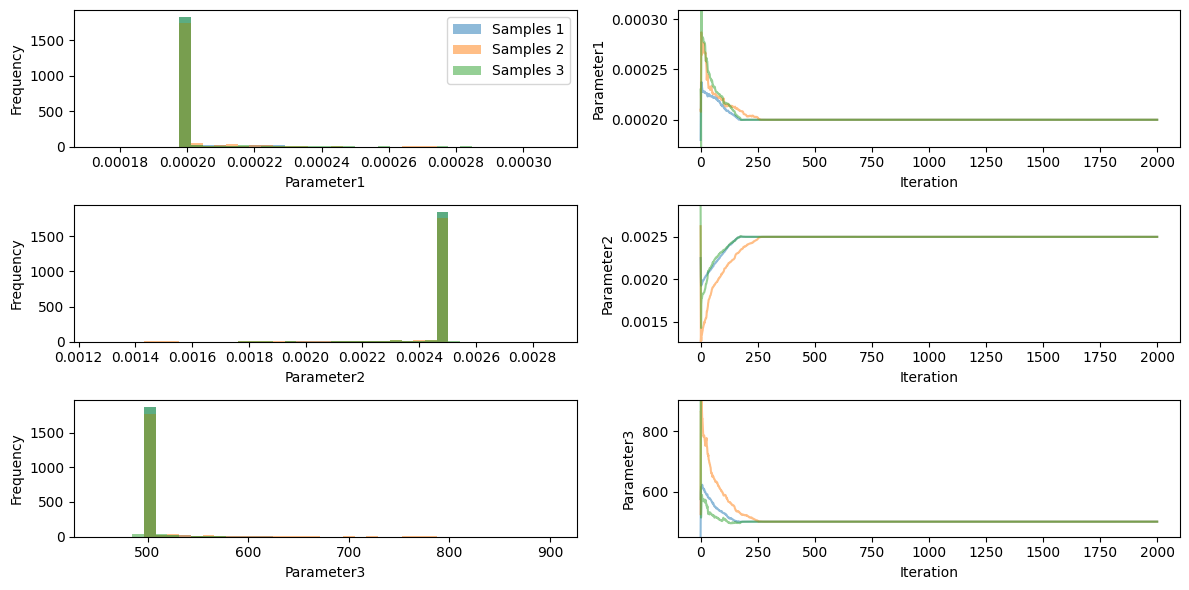

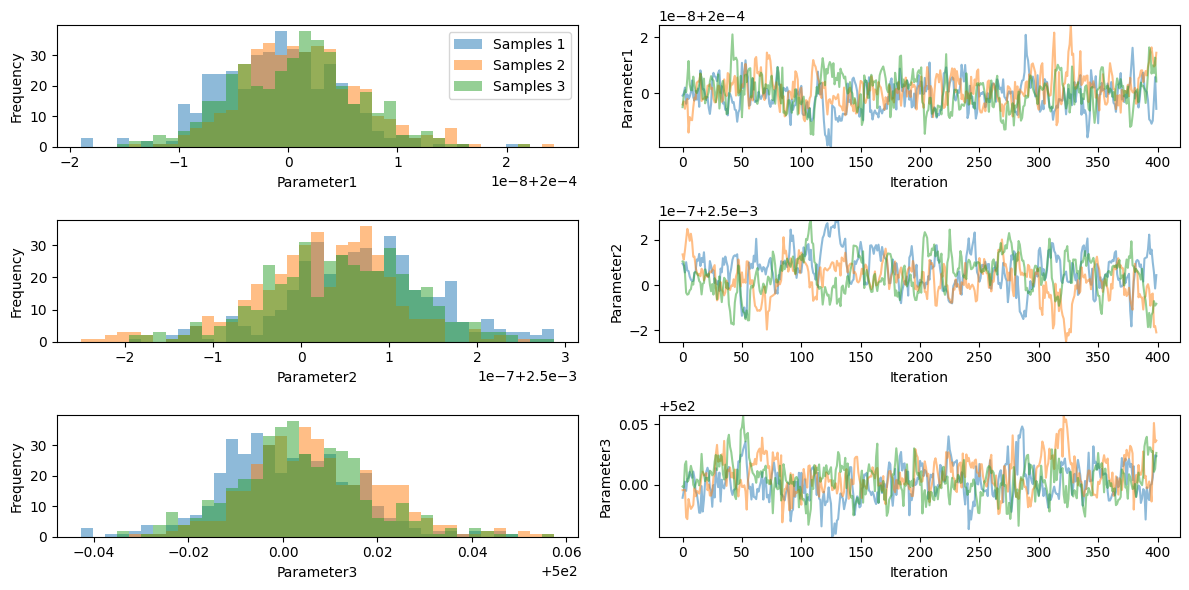

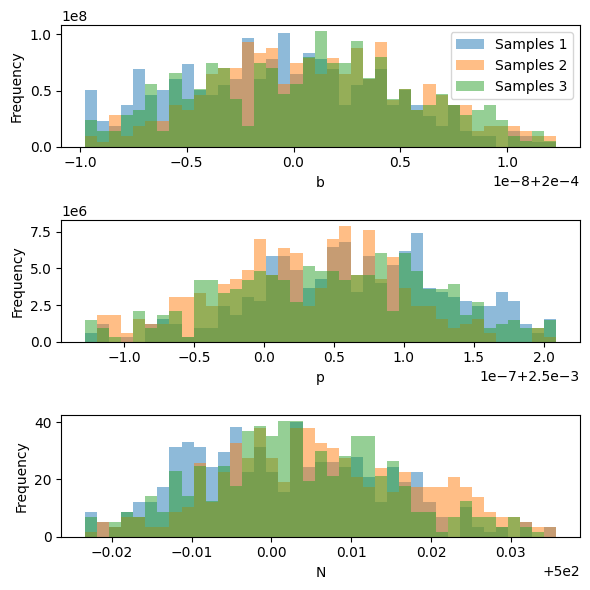

<class '__main__.MyMCMCSummary'>
param    mean    std.      2.5%    25%     50%     75%     97.5%    rhat    ess    ess per sec.
-------  ------  --------  ------  ------  ------  ------  -------  ------  -----  --------------
b        0.0002  5.69e-09  0.0002  0.0002  0.0002  0.0002  0.0002   1.02    179    0.104
p        0.0025  8.42e-08  0.0025  0.0025  0.0025  0.0025  0.0025   1.05    130    0.0763
N        500     0.0146    500     500     500     500     500      1.04    171    0.0999


In [4]:
noise = 1
values = org_values + noise * np.random.normal(0, 0.25, org_values.shape)
problem = pints.MultiOutputProblem(model, times, values)
log_likelihood_2 = pints.GaussianIntegratedLogUniformLogLikelihood(problem)
log_prior = pints.UniformLogPrior(
    [0.0001, 0.001, 100],
    [0.001, 0.01, 2000]
    )
log_posterior = pints.LogPosterior(log_likelihood_2, log_prior)
xs = [
    np.array(true_parameters) * 0.9,
    np.array(true_parameters) * 1.05,
    np.array(true_parameters) * 1.15,
]
ITERS = 2000
mcmc = pints.MCMCController(log_posterior, 3, xs, method=pints.SliceDoublingMCMC)
mcmc.set_max_iterations(ITERS)
chains_1 = mcmc.run()

print(chains_1)

ITERS = 2000
print(3*ITERS/4)

pints.plot.trace(chains_1)
plt.savefig("noisy_data_noise_1_additive_full_distribution.png")
plt.show()

pints.plot.trace(chains_1[:,int(4*ITERS/5):, :])
# plt.savefig("noisy_data_additive_full_distribution.png")
plt.show()

pints.plot.histogram(chains_1[:,int(4*ITERS/5):, :], kde=False, n_percentiles=95, parameter_names=parameter_names)
plt.savefig("hist_only_noisy_data_noise_1_additive_full_distribution.png")
plt.show()

parameter_names = ["b","p","N"]
results = MyMCMCSummary(chains=chains_1[:,int(3*ITERS/4):, :], time=mcmc.time(),
                            parameter_names = parameter_names)
print(type(results))
print(results)

Using Slice Sampling - Doubling
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Time m:s
0     3       0:00.0


/var/folders/lt/9g_w308946v4x_5mqxc951qr0000gr/T/ipykernel_5284/3212037473.py:5: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  log_prior = pints.UniformLogPrior(


1     159     0:01.6
2     342     0:02.6
3     495     0:03.8
20    1998    0:12.5
40    4023    0:23.5
60    6900    0:37.9
80    9693    0:52.3
100   12636   1:07.6
120   15543   1:22.4
140   18579   1:37.7
160   21639   1:53.0
180   24384   2:06.7
200   27402   2:21.8
220   30300   2:36.3
240   33264   2:51.1
260   36141   3:05.5
280   38997   3:19.9
300   41955   3:34.7
320   44673   3:48.4
340   47466   4:02.4
360   50436   4:17.4
380   53496   4:32.7
400   56322   4:46.9
420   59196   5:01.3
440   62136   5:16.2
460   65112   5:31.1
480   68082   5:46.1
500   71184   6:01.7
520   74313   6:17.5
540   77463   6:33.3
560   80454   6:48.4
580   83286   7:02.6
600   86331   7:17.9
620   89214   7:32.3
640   92007   7:46.8
660   94911   8:01.4
680   97704   8:15.4
700   100494   8:29.4
720   103416   8:44.1
740   106401   8:59.1
760   109104   9:12.7
780   111987   9:27.2
800   115014   9:42.4
820   118176   9:58.3
840   121266  10:13.9
860   124131  10:28.3
880   126894  10:42.3
900

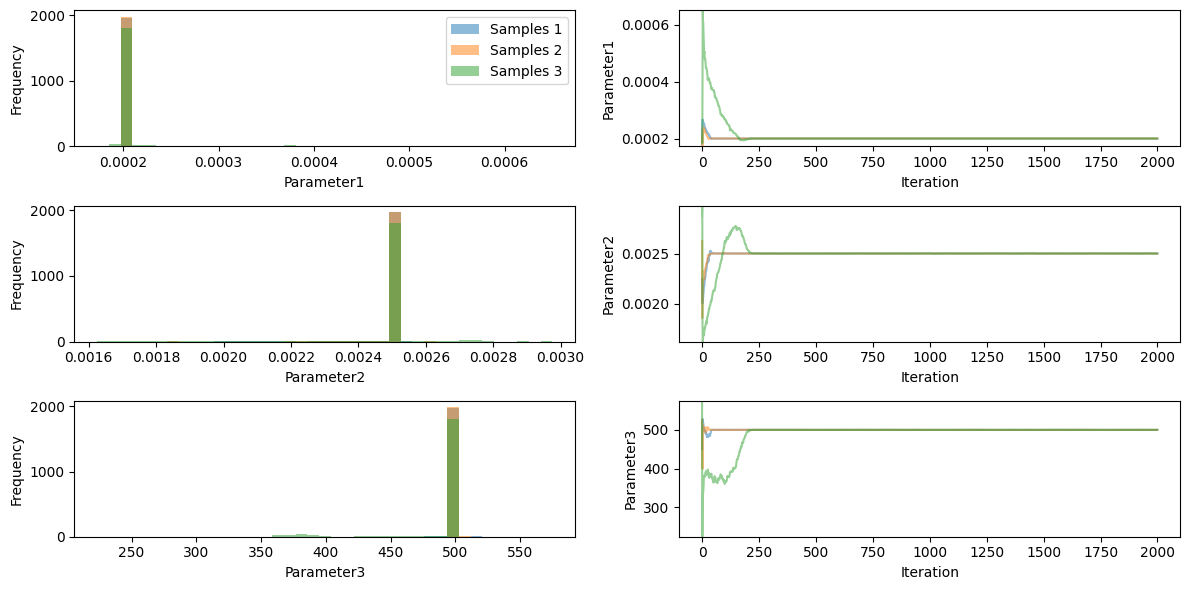

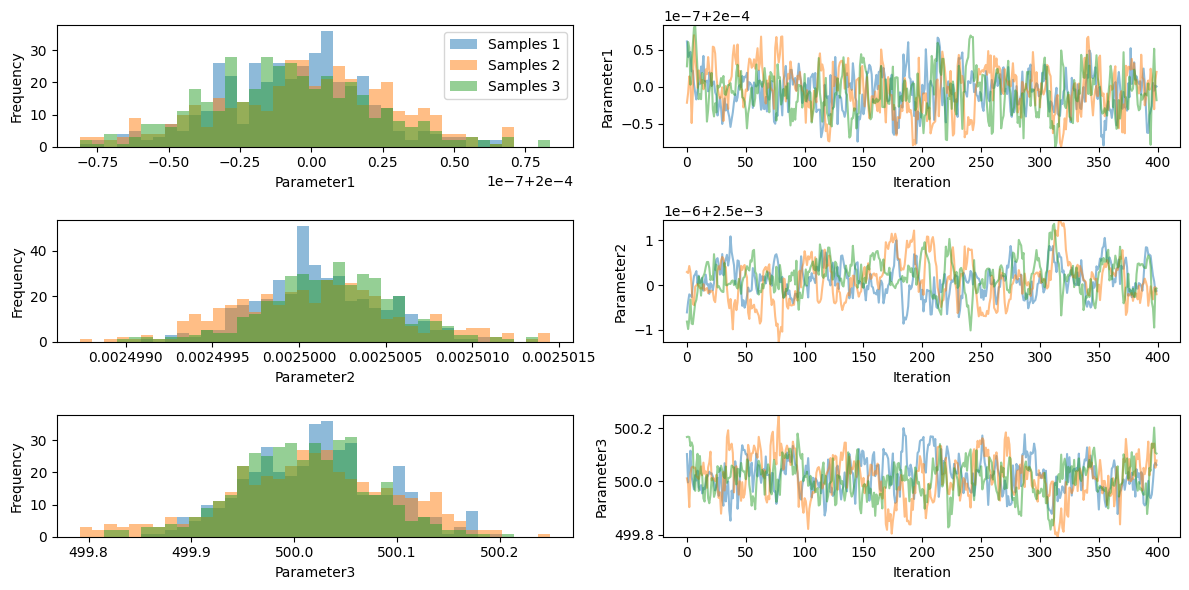

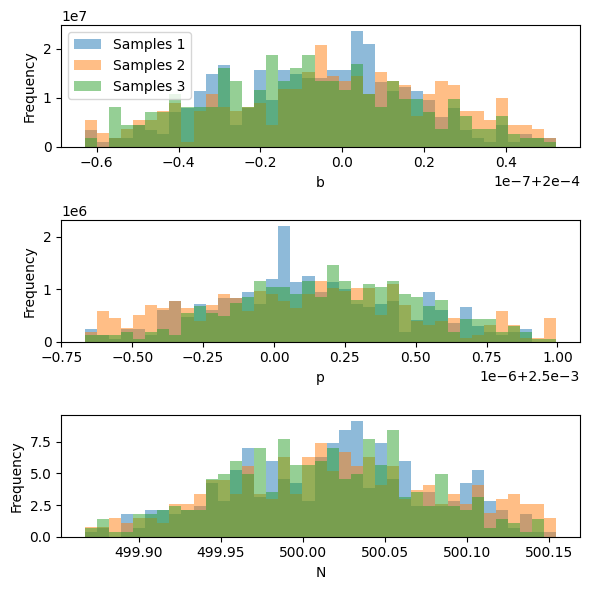

<class '__main__.MyMCMCSummary'>
param    mean    std.      2.5%    25%     50%     75%     97.5%    rhat    ess    ess per sec.
-------  ------  --------  ------  ------  ------  ------  -------  ------  -----  --------------
b        0.0002  2.9e-08   0.0002  0.0002  0.0002  0.0002  0.0002   1.01    225    0.156
p        0.0025  4.22e-07  0.0025  0.0025  0.0025  0.0025  0.0025   1.02    135    0.0935
N        500     0.0727    500     500     500     500     500      1.02    154    0.107


In [5]:
noise = 5
values = org_values + noise * np.random.normal(0, 0.25, org_values.shape)
problem = pints.MultiOutputProblem(model, times, values)
log_likelihood_2 = pints.GaussianIntegratedLogUniformLogLikelihood(problem)
log_prior = pints.UniformLogPrior(
    [0.0001, 0.001, 100],
    [0.001, 0.01, 2000]
    )
log_posterior = pints.LogPosterior(log_likelihood_2, log_prior)
xs = [
    np.array(true_parameters) * 0.9,
    np.array(true_parameters) * 1.05,
    np.array(true_parameters) * 1.15,
]
ITERS = 2000
mcmc = pints.MCMCController(log_posterior, 3, xs, method=pints.SliceDoublingMCMC)
mcmc.set_max_iterations(ITERS)
chains_5 = mcmc.run()

print(chains_5)

ITERS = 2000
print(3*ITERS/4)

pints.plot.trace(chains_5)
plt.savefig("noisy_data_noise_5_additive_full_distribution.png")
plt.show()

pints.plot.trace(chains_5[:,int(4*ITERS/5):, :])
# plt.savefig("noisy_data_additive_full_distribution.png")
plt.show()

pints.plot.histogram(chains_5[:,int(4*ITERS/5):, :], kde=False, n_percentiles=95, parameter_names=parameter_names)
plt.savefig("hist_only_noisy_data_noise_5_additive_full_distribution.png")
plt.show()

parameter_names = ["b","p","N"]
results = MyMCMCSummary(chains=chains_5[:,int(3*ITERS/4):, :], time=mcmc.time(),
                            parameter_names = parameter_names)
print(type(results))
print(results)

Using Slice Sampling - Doubling
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Time m:s
0     3       0:00.0


/var/folders/lt/9g_w308946v4x_5mqxc951qr0000gr/T/ipykernel_5284/3196747279.py:5: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  log_prior = pints.UniformLogPrior(


1     186     0:01.8
2     330     0:03.4
3     492     0:04.3
20    2337    0:15.0
40    5001    0:28.6
60    7686    0:42.2
80    10416   0:56.4
100   12954   1:09.4
120   15780   1:23.7
140   18519   1:37.8
160   21207   1:51.4
180   23949   2:05.3
200   26793   2:19.7
220   29532   2:33.6
240   32232   2:47.2
260   35037   3:01.3
280   37776   3:15.1
300   40545   3:29.0
320   43245   3:42.6
340   45747   3:55.1
360   48423   4:08.7
380   51108   4:22.1
400   53718   4:35.2
420   56298   4:48.9
440   59178   5:04.2
460   61980   5:18.3
480   64704   5:31.9
500   67476   5:45.8
520   70158   5:59.2
540   72873   6:12.9
560   75711   6:27.2
580   78384   6:40.7
600   81072   6:54.1
620   83784   7:07.8
640   86625   7:22.1
660   89172   7:35.2
680   91788   7:48.5
700   94530   8:01.9
720   97080   8:14.4
740   99903   8:28.1
760   102441   8:40.5
780   105174   8:53.8
800   107865   9:06.9
820   110790   9:21.3
840   113349   9:33.8
860   116055   9:47.1
880   118815  10:00.4
900   

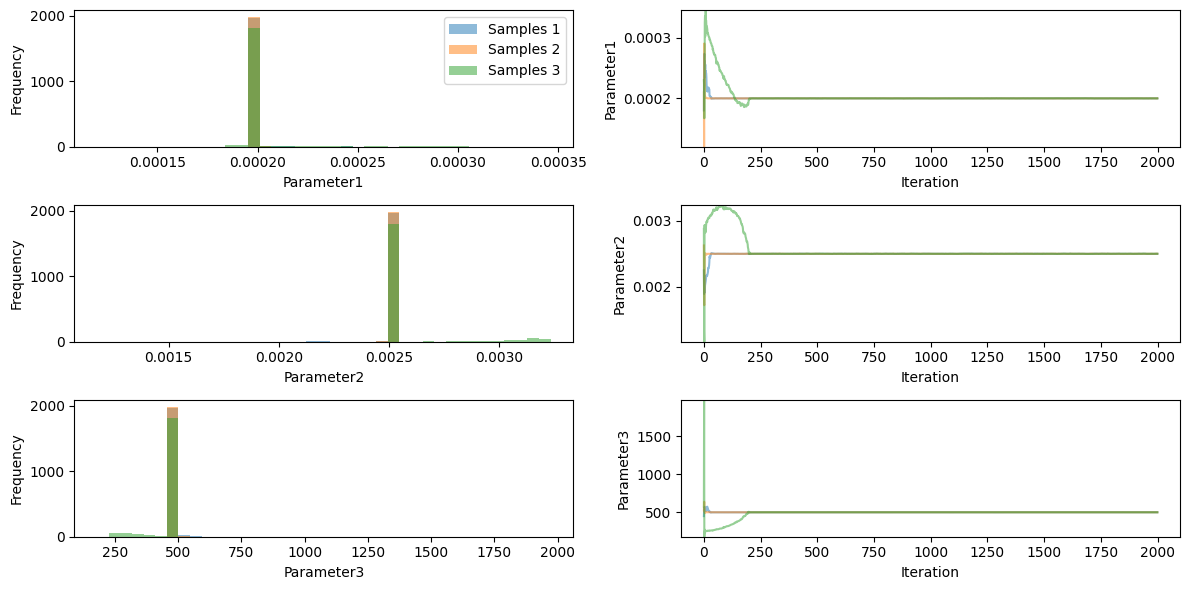

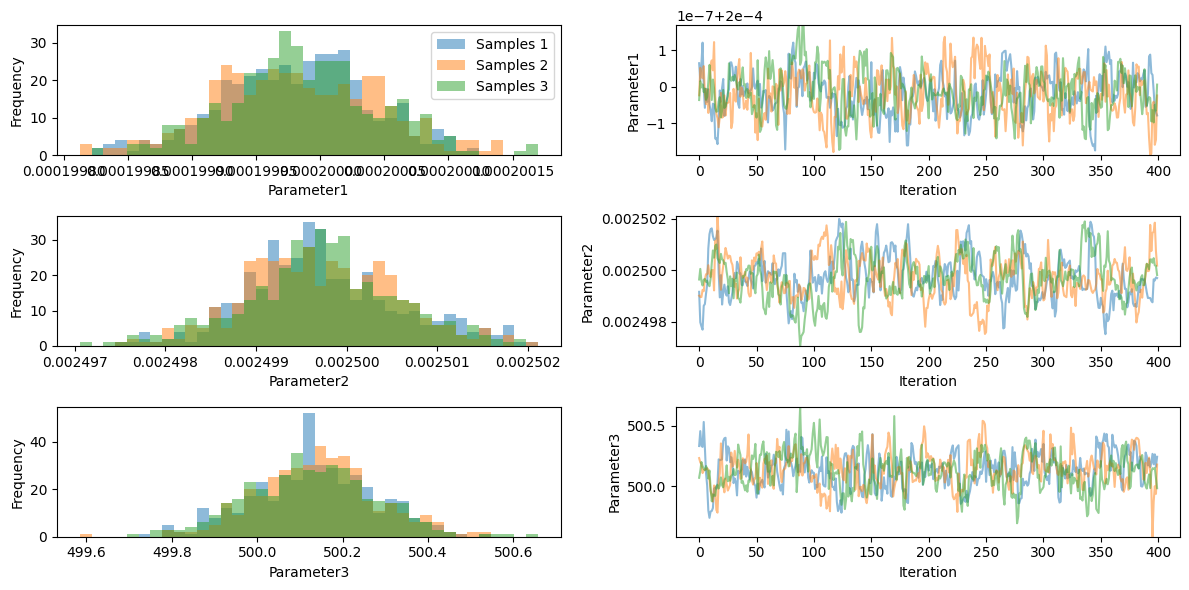

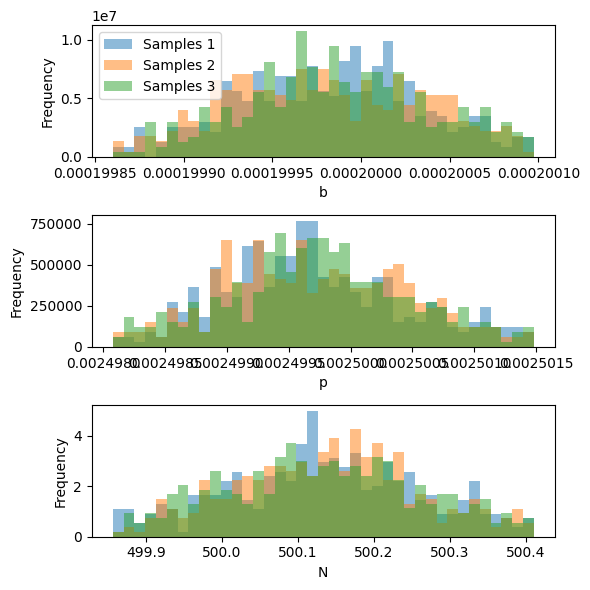

<class '__main__.MyMCMCSummary'>
param    mean    std.      2.5%    25%     50%     75%     97.5%    rhat    ess    ess per sec.
-------  ------  --------  ------  ------  ------  ------  -------  ------  -----  --------------
b        0.0002  6.04e-08  0.0002  0.0002  0.0002  0.0002  0.0002   1       218    0.166
p        0.0025  8.45e-07  0.0025  0.0025  0.0025  0.0025  0.0025   1.01    146    0.11
N        500     0.146     500     500     500     500     500      1.01    187    0.142


In [6]:
noise = 10
values = org_values + noise * np.random.normal(0, 0.25, org_values.shape)
problem = pints.MultiOutputProblem(model, times, values)
log_likelihood_2 = pints.GaussianIntegratedLogUniformLogLikelihood(problem)
log_prior = pints.UniformLogPrior(
    [0.0001, 0.001, 100],
    [0.001, 0.01, 2000]
    )
log_posterior = pints.LogPosterior(log_likelihood_2, log_prior)
xs = [
    np.array(true_parameters) * 0.9,
    np.array(true_parameters) * 1.05,
    np.array(true_parameters) * 1.15,
]
ITERS = 2000
mcmc = pints.MCMCController(log_posterior, 3, xs, method=pints.SliceDoublingMCMC)
mcmc.set_max_iterations(ITERS)
chains_10 = mcmc.run()

print(chains_10)

ITERS = 2000
print(3*ITERS/4)

pints.plot.trace(chains_10)
plt.savefig("noisy_data_noise_10_additive_full_distribution.png")
plt.show()

pints.plot.trace(chains_10[:,int(4*ITERS/5):, :])
# plt.savefig("noisy_data_additive_full_distribution.png")
plt.show()

pints.plot.histogram(chains_10[:,int(4*ITERS/5):, :], kde=False, n_percentiles=95, parameter_names=parameter_names)
plt.savefig("hist_only_noisy_data_noise_10_additive_full_distribution.png")
plt.show()

parameter_names = ["b","p","N"]
results = MyMCMCSummary(chains=chains_10[:,int(3*ITERS/4):, :], time=mcmc.time(),
                            parameter_names = parameter_names)
print(type(results))
print(results)

Using Slice Sampling - Doubling
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Time m:s
0     3       0:00.0


/var/folders/lt/9g_w308946v4x_5mqxc951qr0000gr/T/ipykernel_5284/1645952941.py:5: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  log_prior = pints.UniformLogPrior(


1     174     0:04.5
2     309     0:05.5
3     432     0:06.1
20    2013    0:16.1
40    4314    0:27.5
60    6540    0:38.5
80    8805    0:49.6
100   10959   1:00.0
120   13311   1:11.4
140   15588   1:22.4
160   17976   1:34.0
180   20211   1:44.8
200   22458   1:55.7
220   24711   2:06.7
240   26958   2:17.7
260   29181   2:28.5
280   31392   2:39.2
300   33666   2:50.3
320   35826   3:00.8
340   38100   3:11.8
360   40527   3:23.6
380   42618   3:33.9
400   44727   3:44.2
420   47025   3:55.5
440   49236   4:06.3
460   51513   4:17.3
480   53754   4:28.2
500   55995   4:39.3
520   58308   4:50.5
540   60597   5:01.7
560   62910   5:13.1
580   65160   5:24.1
600   67455   5:35.6
620   69687   5:46.4
640   72036   5:57.9
660   74379   6:09.3
680   76611   6:20.4
700   79092   6:32.5
720   81384   6:43.6
740   83682   6:54.8
760   85827   7:05.3
780   88095   7:16.2
800   90270   7:26.7
820   92397   7:37.1
840   94617   7:47.8
860   97137   8:00.2
880   99510   8:12.6
900   101706 

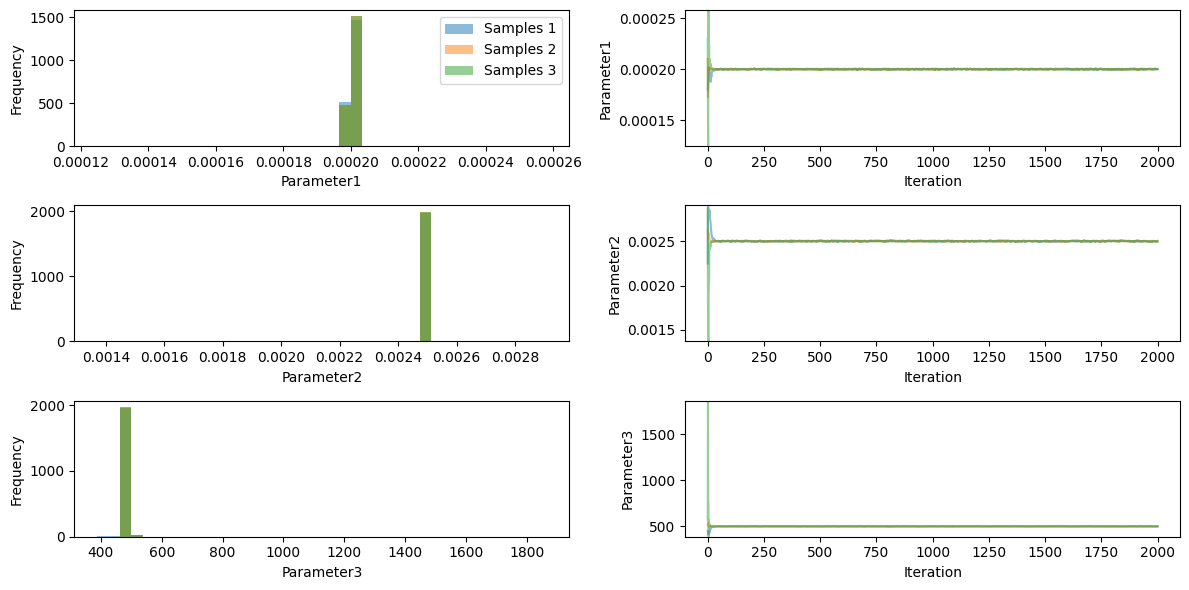

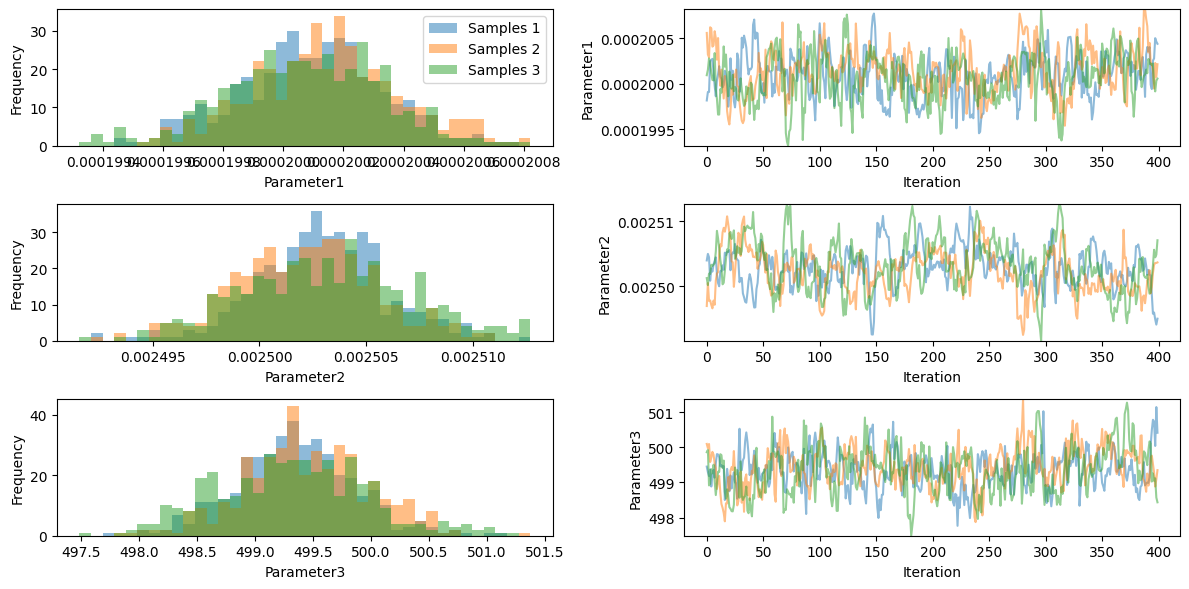

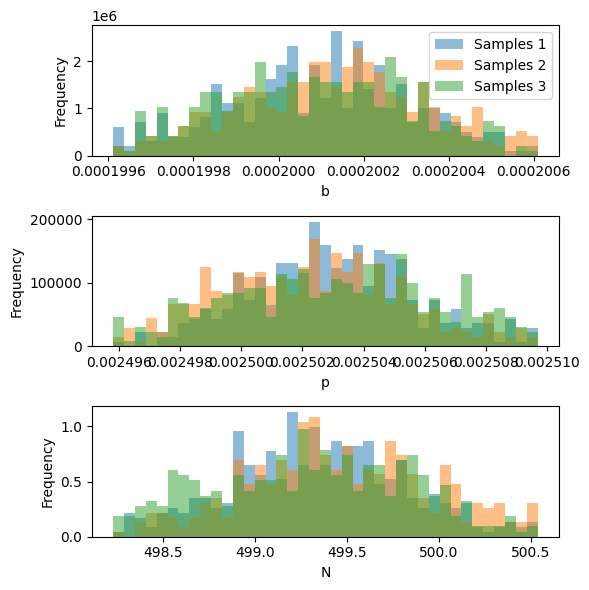

<class '__main__.MyMCMCSummary'>
param    mean    std.      2.5%    25%     50%     75%     97.5%     rhat    ess    ess per sec.
-------  ------  --------  ------  ------  ------  ------  --------  ------  -----  --------------
b        0.0002  2.48e-07  0.0002  0.0002  0.0002  0.0002  0.000201  1.01    181    0.163
p        0.0025  3.49e-06  0.0025  0.0025  0.0025  0.0025  0.00251   1.02    143    0.129
N        499     0.58      498     499     499     500     501       1.01    182    0.164


In [7]:
noise = 10
values = org_values + noise * np.random.normal(0, 1, org_values.shape)
problem = pints.MultiOutputProblem(model, times, values)
log_likelihood_2 = pints.GaussianIntegratedLogUniformLogLikelihood(problem)
log_prior = pints.UniformLogPrior(
    [0.0001, 0.001, 100],
    [0.001, 0.01, 2000]
    )
log_posterior = pints.LogPosterior(log_likelihood_2, log_prior)
xs = [
    np.array(true_parameters) * 0.9,
    np.array(true_parameters) * 1.05,
    np.array(true_parameters) * 1.15,
]
ITERS = 2000
mcmc = pints.MCMCController(log_posterior, 3, xs, method=pints.SliceDoublingMCMC)
mcmc.set_max_iterations(ITERS)
chains_10_var = mcmc.run()

print(chains_10_var)

ITERS = 2000
print(3*ITERS/4)

pints.plot.trace(chains_10_var)
plt.savefig("noisy_data_noise_10_larger_st_dev_additive_full_distribution.png")
plt.show()

pints.plot.trace(chains_10_var[:,int(4*ITERS/5):, :])
# plt.savefig("noisy_data_additive_full_distribution.png")
plt.show()

pints.plot.histogram(chains_10_var[:,int(4*ITERS/5):, :], kde=False, n_percentiles=95, parameter_names=parameter_names)
plt.savefig("hist_only_noisy_data_noise_10_larger_st_dev_additive_full_distribution.png")
plt.show()

parameter_names = ["b","p","N"]
results = MyMCMCSummary(chains=chains_10_var[:,int(3*ITERS/4):, :], time=mcmc.time(),
                            parameter_names = parameter_names)
print(type(results))
print(results)

Using Slice Sampling - Doubling
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Time m:s
0     3       0:00.0


/var/folders/lt/9g_w308946v4x_5mqxc951qr0000gr/T/ipykernel_5284/2601850448.py:5: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  log_prior = pints.UniformLogPrior(


1     195     0:03.4
2     327     0:05.1
3     474     0:07.4
20    2184    0:18.4
40    4452    0:30.5
60    6843    0:42.9
80    9177    0:54.9
100   11529   1:08.2
120   13944   1:21.0
140   16377   1:33.6
160   18651   1:45.6
180   21090   1:58.2
200   23526   2:10.9
220   25971   2:23.6
240   28527   2:36.8
260   30981   2:49.5
280   33384   3:01.9
300   35838   3:14.6
320   38199   3:26.8
340   40764   3:40.2
360   43155   3:52.4
380   45555   4:05.0
400   48051   4:17.9
420   50370   4:30.1
440   52746   4:42.5
460   55140   4:54.9
480   57552   5:07.4
500   59958   5:19.8
520   62412   5:32.6
540   64812   5:45.1
560   67176   5:57.3
580   69699   6:10.3
600   72003   6:22.2
620   74403   6:34.7
640   76878   6:47.6
660   79362   7:00.3
680   81615   7:12.0
700   83976   7:25.2
720   86439   7:38.2
740   88824   7:50.8
760   91242   8:03.3
780   93546   8:15.5
800   96039   8:28.4
820   98532   8:41.2
840   100932   8:53.6
860   103449   9:06.6
880   105804   9:18.7
900   1083

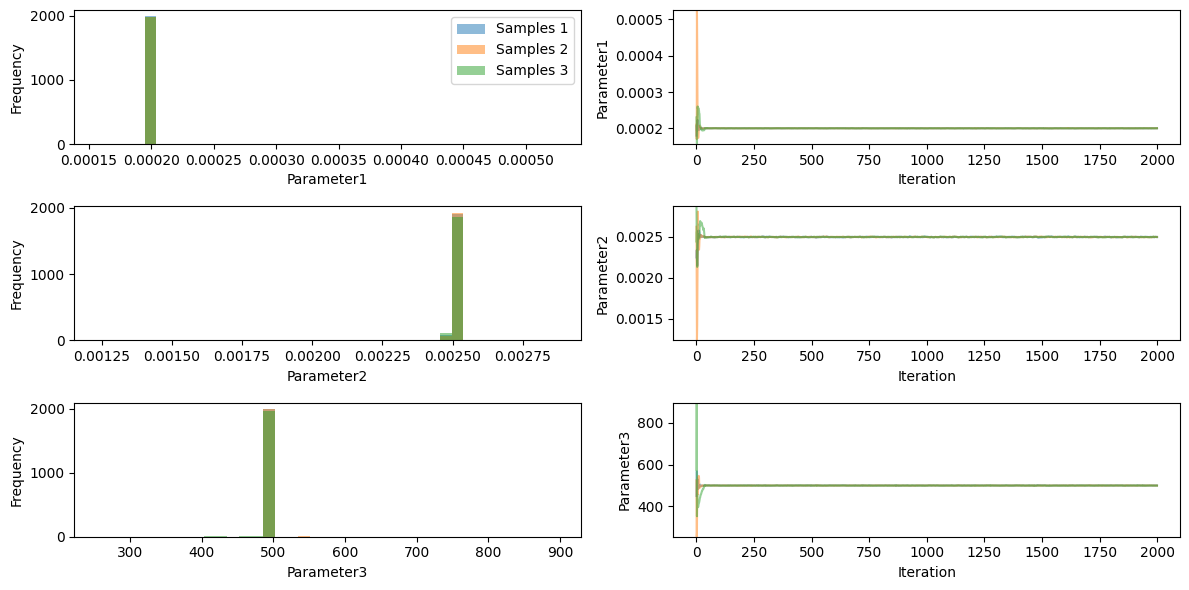

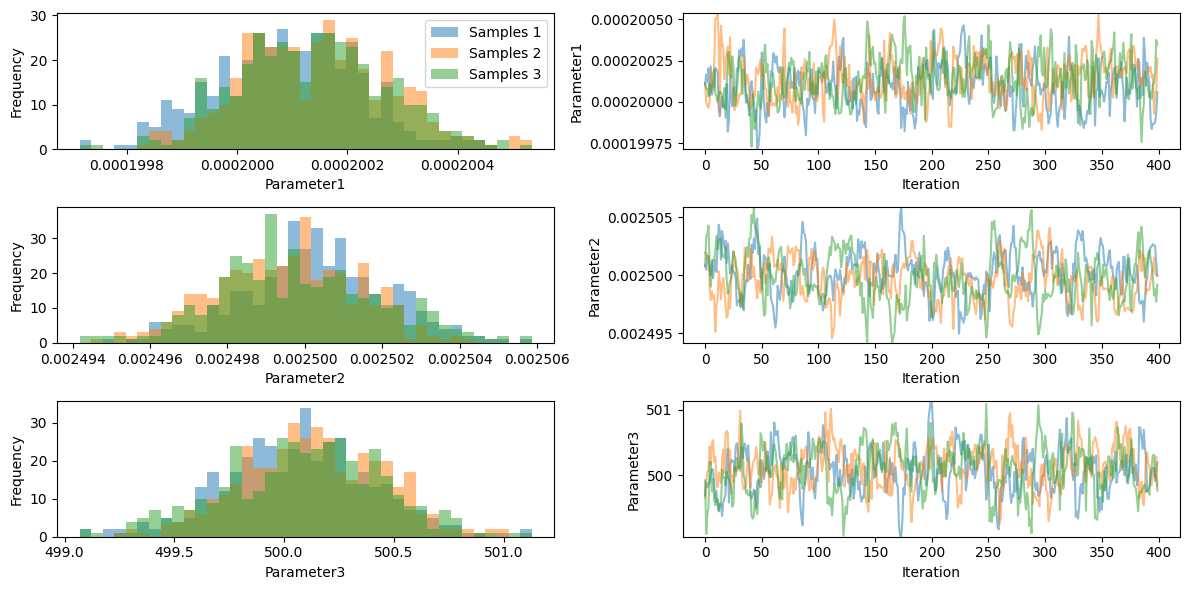

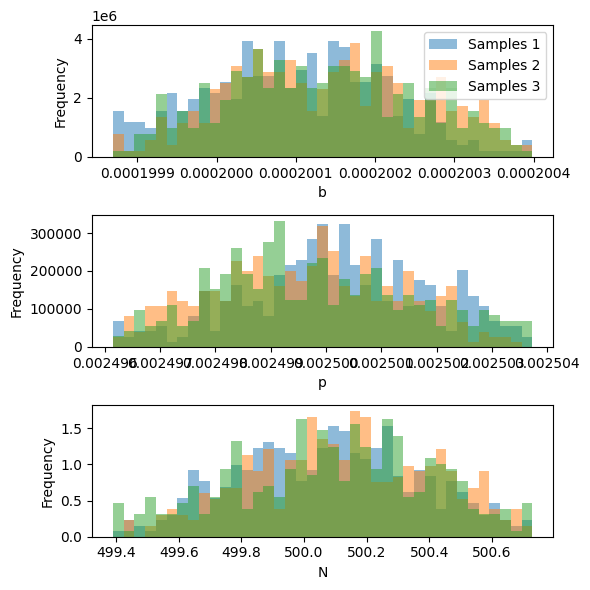

<class '__main__.MyMCMCSummary'>
param    mean    std.      2.5%    25%     50%     75%     97.5%    rhat    ess    ess per sec.
-------  ------  --------  ------  ------  ------  ------  -------  ------  -----  --------------
b        0.0002  1.39e-07  0.0002  0.0002  0.0002  0.0002  0.0002   1.03    218    0.175
p        0.0025  2.02e-06  0.0025  0.0025  0.0025  0.0025  0.0025   1.04    151    0.121
N        500     0.349     499     500     500     500     501      1.02    190    0.153


In [8]:
noise = 25
values = org_values + noise * np.random.normal(0, 0.25, org_values.shape)
problem = pints.MultiOutputProblem(model, times, values)
log_likelihood_2 = pints.GaussianIntegratedLogUniformLogLikelihood(problem)
log_prior = pints.UniformLogPrior(
    [0.0001, 0.001, 100],
    [0.001, 0.01, 2000]
    )
log_posterior = pints.LogPosterior(log_likelihood_2, log_prior)
xs = [
    np.array(true_parameters) * 0.9,
    np.array(true_parameters) * 1.05,
    np.array(true_parameters) * 1.15,
]
ITERS = 2000
mcmc = pints.MCMCController(log_posterior, 3, xs, method=pints.SliceDoublingMCMC)
mcmc.set_max_iterations(ITERS)
chains_25 = mcmc.run()

print(chains_25)

ITERS = 2000
print(3*ITERS/4)

pints.plot.trace(chains_25)
plt.savefig("noisy_data_noise_25_additive_full_distribution.png")
plt.show()

pints.plot.trace(chains_25[:,int(4*ITERS/5):, :])
# plt.savefig("noisy_data_additive_full_distribution.png")
plt.show()

pints.plot.histogram(chains_25[:,int(4*ITERS/5):, :], kde=False, n_percentiles=95, parameter_names=parameter_names)
plt.savefig("hist_only_noisy_data_noise_25_additive_full_distribution.png")
plt.show()

parameter_names = ["b","p","N"]
results = MyMCMCSummary(chains=chains_25[:,int(3*ITERS/4):, :], time=mcmc.time(),
                            parameter_names = parameter_names)
print(type(results))
print(results)

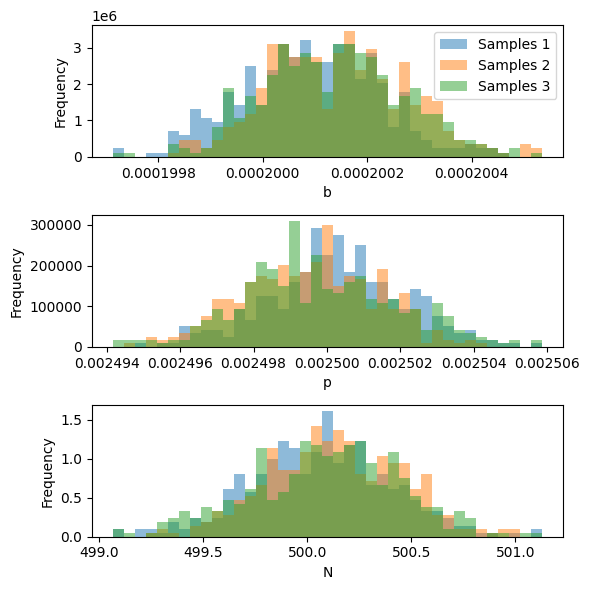

In [31]:
ITERS = 2000
pints.plot.histogram(chains_25[:,int(4*ITERS/5):, :], kde=False, n_percentiles=100, parameter_names=parameter_names)
plt.savefig("0_hist_only_noisy_data_noise_25_additive_full_distribution.png")
plt.show()

chains_25_2 = chains_25

Multiplicative noise

/var/folders/lt/9g_w308946v4x_5mqxc951qr0000gr/T/ipykernel_5284/4197004800.py:9: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  log_prior = pints.UniformLogPrior(


Using Slice Sampling - Doubling
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Time m:s
0     3       0:00.0
1     156     0:01.5
2     315     0:03.5
3     465     0:04.2
20    2178    0:15.9
40    4023    0:25.3
60    6126    0:36.1
80    8235    0:47.0
100   10419   0:58.3
120   12612   1:09.6
140   14751   1:20.5
160   16965   1:31.7
180   21189   1:53.3
200   25245   2:14.0
220   29655   2:36.3
240   34215   2:59.5
260   38808   3:23.1
280   43548   3:47.1
300   47877   4:09.0
320   52341   4:31.7
340   56610   4:53.4
360   60501   5:13.2
380   64452   5:33.5
400   69117   5:57.4
420   73455   6:19.4
440   77979   6:42.3
460   82245   7:04.0
480   86733   7:26.6
500   91122   7:48.5
520   95634   8:11.3
540   100152   8:34.0
560   104325   8:55.1
580   108738   9:17.3
600   113151   9:39.5
620   117816  10:03.0
640   122451  10:26.3
660   127059  10:49.4
680   131172  11:10.2
700   135705  11:33.0
720   140199  11:55.7
740   143958  12:14.6
760   148560  12:37.9
780 

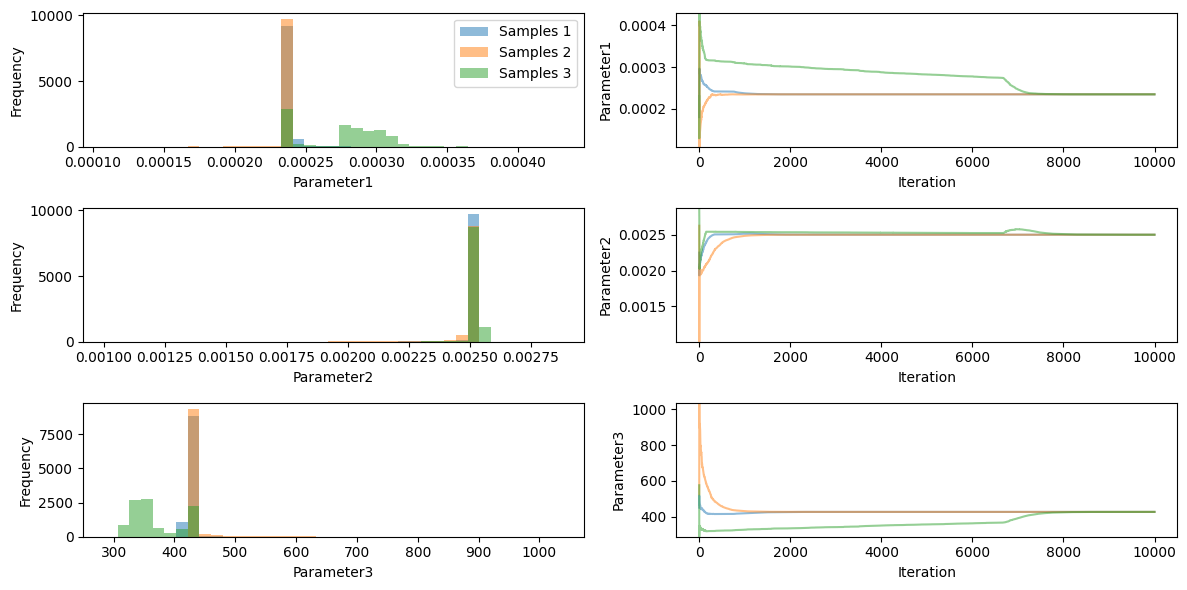

<class '__main__.MyMCMCSummary'>
param    mean     std.     2.5%      25%       50%       75%       97.5%     rhat    ess    ess per sec.
-------  -------  -------  --------  --------  --------  --------  --------  ------  -----  --------------
b        0.00024  1.4e-05  0.000235  0.000235  0.000235  0.000235  0.000281  2.27    21.9   0.0012
p        0.00251  1.5e-05  0.0025    0.0025    0.0025    0.0025    0.00256   2.04    457    0.025
N        417      21.3     358       426       426       426       426       3.05    24.9   0.00136


In [12]:
scale = 0.25
a=-4 # a = -1/scale
b=4 # b = 1/scale

noise = 1
values = org_values * noise * (1 + stats.truncnorm.rvs(a, b, loc=0, scale=scale, size=1))
problem = pints.MultiOutputProblem(model, times, values)
log_likelihood_2 = pints.GaussianIntegratedLogUniformLogLikelihood(problem)
log_prior = pints.UniformLogPrior(
    [0.0001, 0.001, 100],
    [0.001, 0.01, 2000]
    )
log_posterior = pints.LogPosterior(log_likelihood_2, log_prior)
xs = [
    np.array(true_parameters) * 0.9,
    np.array(true_parameters) * 1.05,
    np.array(true_parameters) * 1.15,
]
ITERS = 10000
mcmc = pints.MCMCController(log_posterior, 3, xs, method=pints.SliceDoublingMCMC)
mcmc.set_max_iterations(ITERS)
chains_mult_4 = mcmc.run()
print(chains_mult_4)

pints.plot.trace(chains_mult_4)
plt.savefig("noisy_data_multiplicative_4_full_distribution.png")
plt.show()

parameter_names = ["b","p","N"]
results = MyMCMCSummary(chains=chains_mult_4[:,int(ITERS/2):, :], time=mcmc.time(),
                            parameter_names = parameter_names)
print(type(results))
print(results)

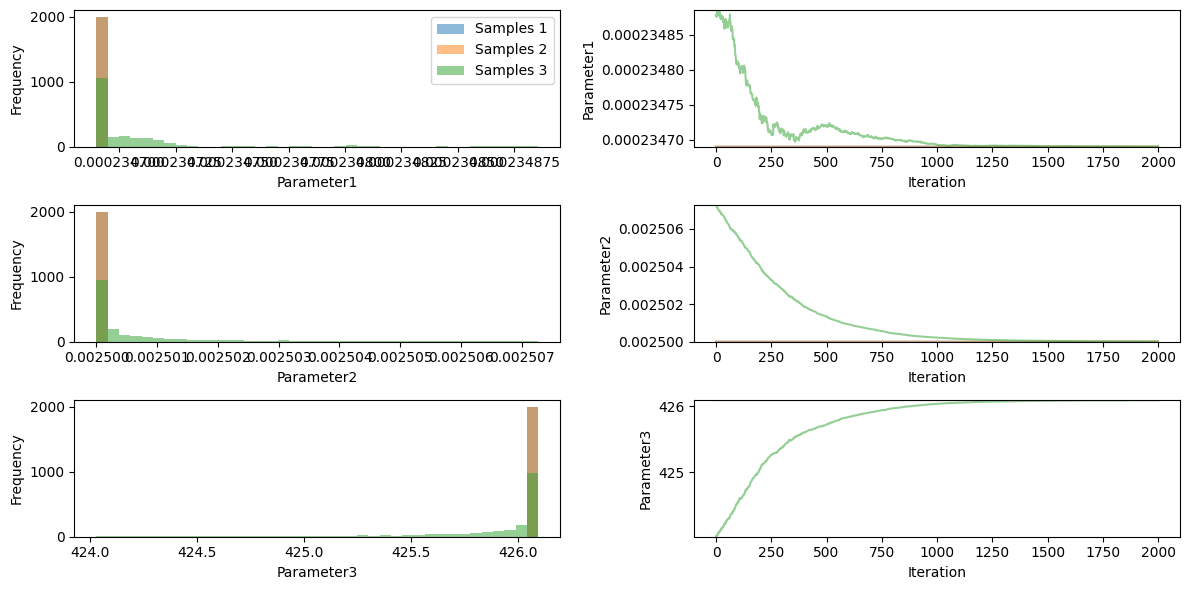

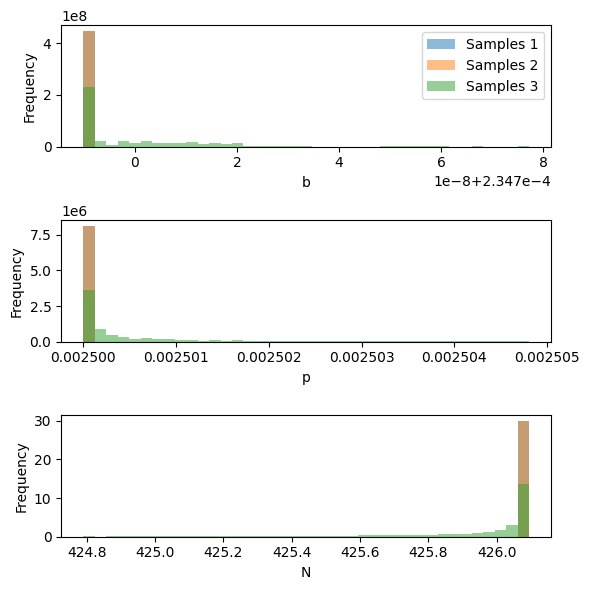

<class '__main__.MyMCMCSummary'>
param    mean      std.      2.5%      25%       50%       75%       97.5%     rhat    ess    ess per sec.
-------  --------  --------  --------  --------  --------  --------  --------  ------  -----  --------------
b        0.000235  1.59e-07  0.000235  0.000235  0.000235  0.000235  0.000235  1.3     20.4   0.000951
p        0.0025    4.43e-06  0.0025    0.0025    0.0025    0.0025    0.00252   1.42    402    0.0188
N        426       1.31      421       426       426       426       426       1.4     14.4   0.000672


In [15]:
ITERS=10000
pints.plot.trace(chains_mult_4[:,int(4*ITERS/5):, :])
# plt.savefig("noisy_data_additive_full_distribution.png")
plt.show()

pints.plot.histogram(chains_mult_4[:,int(4*ITERS/5):, :], kde=False, n_percentiles=95, parameter_names=parameter_names)
plt.savefig("hist_only_noisy_data_noise_25_additive_full_distribution.png")
plt.show()

parameter_names = ["b","p","N"]
results = MyMCMCSummary(chains=chains_mult_4[:,int(3*ITERS/4):, :], time=mcmc.time(),
                            parameter_names = parameter_names)
print(type(results))
print(results)

Using Slice Sampling - Doubling
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Time m:s
0     3       0:00.0


/var/folders/lt/9g_w308946v4x_5mqxc951qr0000gr/T/ipykernel_5284/3811079826.py:9: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  log_prior = pints.UniformLogPrior(


1     153     0:01.6
2     282     0:02.3
3     402     0:02.8
20    2025    0:10.8
40    4059    0:20.9
60    6279    0:31.9
80    8421    0:42.4
100   10680   0:53.5
120   12969   1:04.7
140   14991   1:15.2
160   17151   1:25.8
180   19206   1:36.3
200   21672   1:48.4
220   24084   2:00.1
240   26586   2:12.3
260   28974   2:23.9
280   31425   2:35.9
300   33897   2:47.8
320   36123   2:58.8
340   38613   3:11.0
360   41070   3:22.8
380   43719   3:35.7
400   46260   3:47.9
420   48867   4:00.6
440   51531   4:13.3
460   54291   4:26.8
480   56973   4:39.8
500   59748   4:53.2
520   62583   5:07.0
540   65319   5:20.2
560   68286   5:34.4
580   70926   5:47.1
600   73776   6:01.0
620   76524   6:14.1
640   79296   6:27.4
660   82155   6:41.4
680   85119   6:55.6
700   88026   7:09.7
720   90831   7:23.3
740   93846   7:37.7
760   97074   7:53.4
780   100158   8:08.2
800   103299   8:23.2
820   106485   8:38.6
840   109389   8:52.4
860   112779   9:08.6
880   115806   9:23.2
900   1

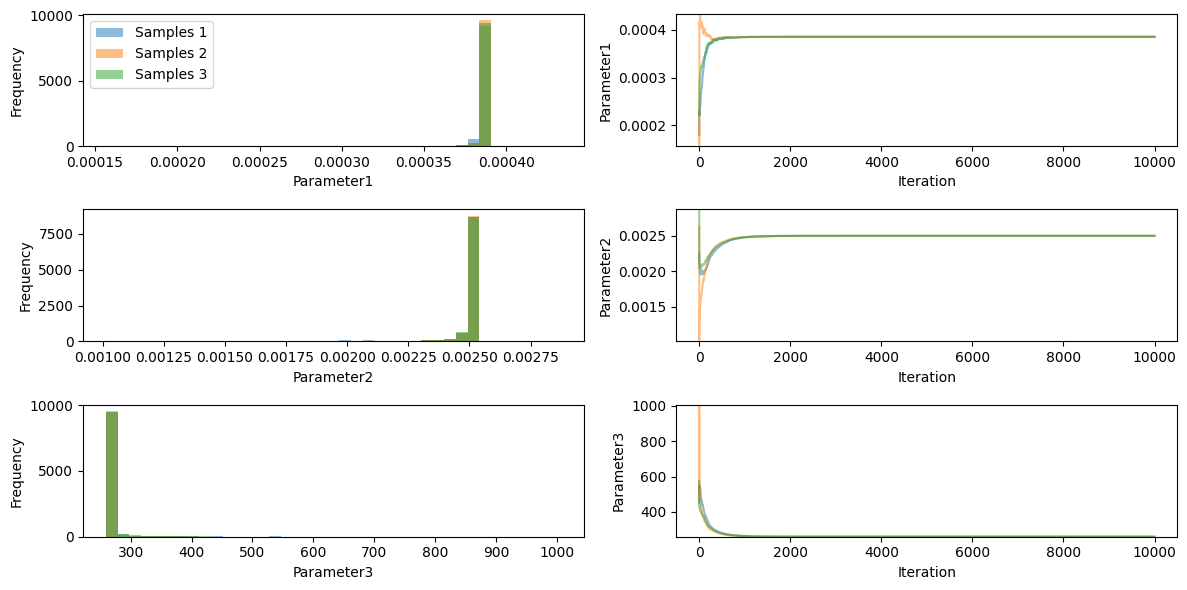

<class '__main__.MyMCMCSummary'>
param    mean      std.      2.5%      25%       50%       75%       97.5%     rhat      ess    ess per sec.
-------  --------  --------  --------  --------  --------  --------  --------  --------  -----  --------------
b        0.000385  8.47e-13  0.000385  0.000385  0.000385  0.000385  0.000385  593       11.6   0.000512
p        0.0025    7.17e-12  0.0025    0.0025    0.0025    0.0025    0.0025    1.01e+03  730    0.0323
N        259       1.24e-06  259       259       259       259       259       2.69e+03  10.8   0.000477


In [13]:
scale = 0.5
a=-2 # a = -1/scale
b=2 # b = 1/scale

noise = 1
values = org_values * noise * (1 + stats.truncnorm.rvs(a, b, loc=0, scale=scale, size=1))
problem = pints.MultiOutputProblem(model, times, values)
log_likelihood_2 = pints.GaussianIntegratedLogUniformLogLikelihood(problem)
log_prior = pints.UniformLogPrior(
    [0.0001, 0.001, 100],
    [0.001, 0.01, 2000]
    )
log_posterior = pints.LogPosterior(log_likelihood_2, log_prior)
xs = [
    np.array(true_parameters) * 0.9,
    np.array(true_parameters) * 1.05,
    np.array(true_parameters) * 1.15,
]
ITERS = 10000
mcmc = pints.MCMCController(log_posterior, 3, xs, method=pints.SliceDoublingMCMC)
mcmc.set_max_iterations(ITERS)
chains_mult_2 = mcmc.run()
print(chains_mult_2)

pints.plot.trace(chains_mult_2)
plt.savefig("noisy_data_multiplicative_2_full_distribution.png")
plt.show()

parameter_names = ["b","p","N"]
results = MyMCMCSummary(chains=chains_mult_2[:,int(ITERS/2):, :], time=mcmc.time(),
                            parameter_names = parameter_names)
print(type(results))
print(results)

Using Slice Sampling - Doubling
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Time m:s
0     3       0:00.0


/var/folders/lt/9g_w308946v4x_5mqxc951qr0000gr/T/ipykernel_5284/173036842.py:9: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  log_prior = pints.UniformLogPrior(


1     180     0:02.2
2     285     0:03.5
3     381     0:04.1
20    2190    0:14.4
40    4533    0:27.0
60    6744    0:38.8
80    8898    0:49.9
100   11109   1:01.9
120   13386   1:13.9
140   15828   1:26.9
160   18168   1:39.5
180   20478   1:52.8
200   22989   2:06.8
220   25434   2:20.0
240   27714   2:32.5
260   30162   2:45.2
280   32562   2:58.1
300   34935   3:10.1
320   37296   3:22.3
340   39558   3:34.5
360   41910   3:47.5
380   44310   3:59.9
400   46698   4:11.9
420   48948   4:23.0
440   51468   4:35.9
460   53781   4:47.5
480   56418   5:00.6
500   59025   5:13.5
520   61404   5:25.9
540   64029   5:39.2
560   66498   5:51.8
580   69072   6:05.4
600   71712   6:18.6
620   74307   6:31.9
640   77001   6:45.3
660   79524   6:57.9
680   82260   7:12.1
700   84921   7:25.3
720   87603   7:39.1
740   90195   7:52.2
760   92769   8:05.5
780   95250   8:17.9
800   97956   8:31.4
820   100491   8:44.0
840   103005   8:56.8
860   105699   9:10.3
880   108309   9:23.5
900   110

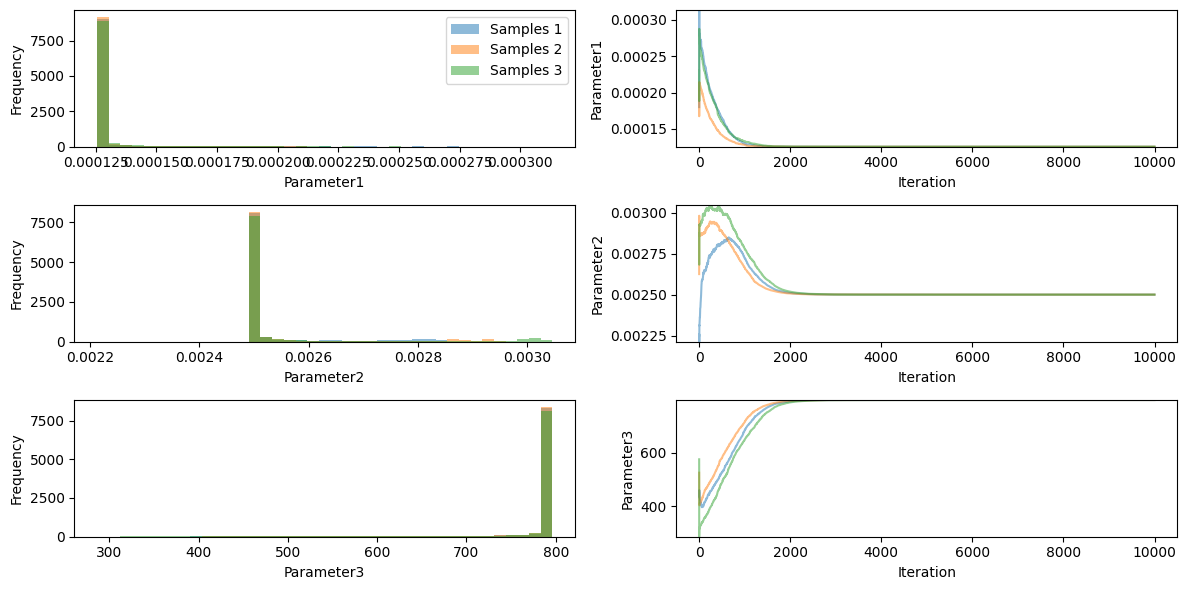

<class '__main__.MyMCMCSummary'>
param    mean      std.      2.5%      25%       50%       75%       97.5%     rhat    ess    ess per sec.
-------  --------  --------  --------  --------  --------  --------  --------  ------  -----  --------------
b        0.000126  1.99e-14  0.000126  0.000126  0.000126  0.000126  0.000126  1.23    50.4   0.00235
p        0.0025    3.02e-13  0.0025    0.0025    0.0025    0.0025    0.0025    1.04    63.6   0.00297
N        796       1.89e-07  796       796       796       796       796       1.06    56.7   0.00265


In [14]:
scale = 1
a=-1 # a = -1/scale
b=1 # b = 1/scale

noise = 1
values = org_values * noise * (1 + stats.truncnorm.rvs(a, b, loc=0, scale=scale, size=1))
problem = pints.MultiOutputProblem(model, times, values)
log_likelihood_2 = pints.GaussianIntegratedLogUniformLogLikelihood(problem)
log_prior = pints.UniformLogPrior(
    [0.0001, 0.001, 100],
    [0.001, 0.01, 2000]
    )
log_posterior = pints.LogPosterior(log_likelihood_2, log_prior)
xs = [
    np.array(true_parameters) * 0.9,
    np.array(true_parameters) * 1.05,
    np.array(true_parameters) * 1.15,
]
ITERS = 10000
mcmc = pints.MCMCController(log_posterior, 3, xs, method=pints.SliceDoublingMCMC)
mcmc.set_max_iterations(ITERS)
chains_mult_1 = mcmc.run()
print(chains_mult_1)

pints.plot.trace(chains_mult_1)
plt.savefig("noisy_data_multiplicative_1_full_distribution.png")
plt.show()

parameter_names = ["b","p","N"]
results = MyMCMCSummary(chains=chains_mult_1[:,int(ITERS/2):, :], time=mcmc.time(),
                            parameter_names = parameter_names)
print(type(results))
print(results)